In [11]:
# http://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/?__s=sgiodc9fdbcs7csewpiy
# https://github.com/jrosebr1/imutils/blob/master/imutils/
%matplotlib inline
from matplotlib import pyplot as plt, cm
import skdemo
from imutils.convenience import resize
from imutils.perspective import four_point_transform
from skimage.filters import threshold_adaptive
import cv2
import numpy as np

In [12]:
# Step 1: Detect edges.
# Step 2: Use the edges in the image to find the contour (outline) representing the piece of paper being scanned.
# Step 3: Apply a perspective transform to obtain the top-down view of the document.

STEP 1: Edge Detection


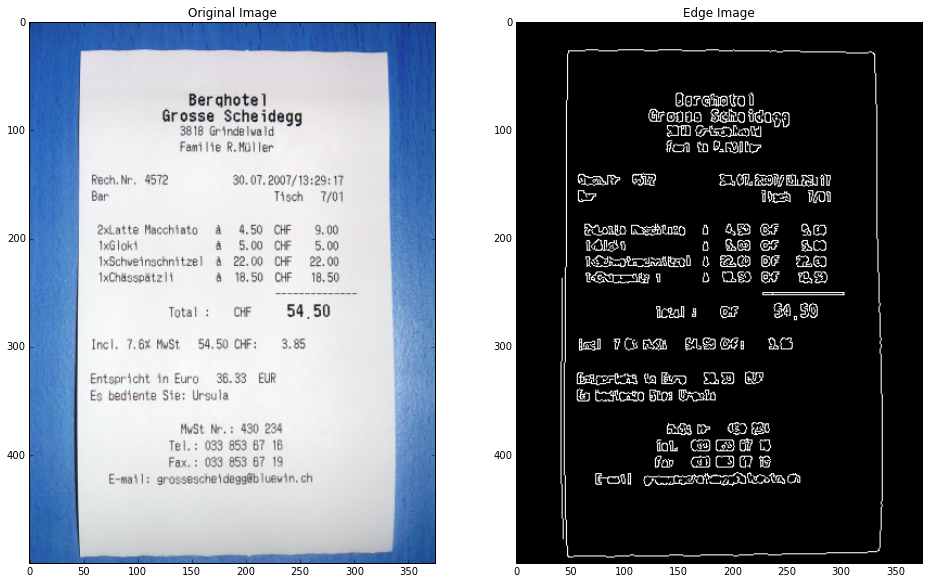

In [13]:
# Step 1: Edge Detection

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("./data/ReceiptSwiss.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)


# show the original image and the edge detected image
print "STEP 1: Edge Detection"
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(edged, cmap = 'gray')
plt.title('Edge Image')

STEP 2: Find contours of paper


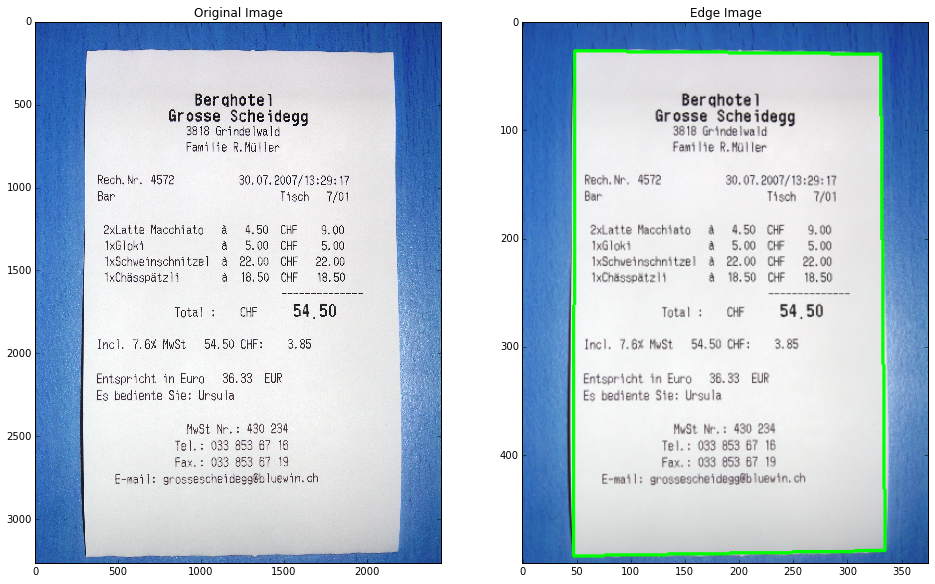

In [23]:
# Step 2: Use the edges in the image to find the contour (outline) representing the piece of paper being scanned.
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
	# approximate the contour
    # curve – Input vector of 2D points, stored in std::vector or Mat.
    # closed – Flag indicating whether the curve is closed or not.
	peri = cv2.arcLength(c, True) # arcLength 곡선의 길이를 계산
    
    # approxCurve – Result of the approximation. The type should match the type of the input curve. In case of C interface the approximated curve is stored in the memory storage and pointer to it is returned.
    # epsilon – Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
    # closed – If true, the approximated curve is closed (its first and last vertices are connected). Otherwise, it is not closed.
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
 
# show the contour (outline) of the piece of paper
print "STEP 2: Find contours of paper"
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(orig, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(image, cmap = 'gray')
plt.title('Edge Image')

STEP 3: Apply perspective transform


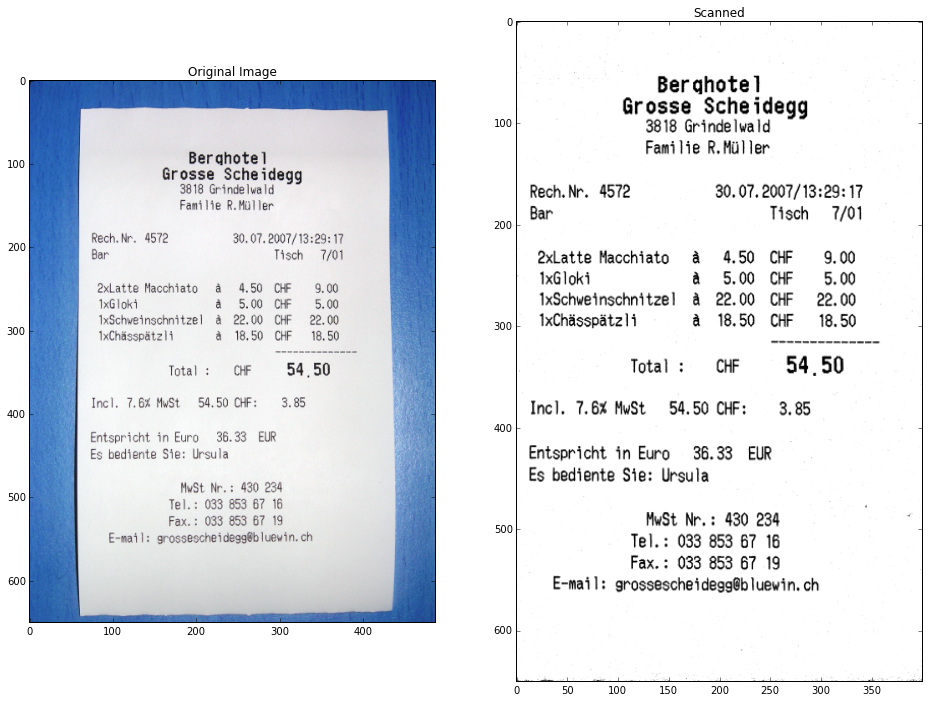

In [15]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = threshold_adaptive(warped, 250, offset = 10)
warped = warped.astype("uint8") * 255
 
# show the original and scanned images
print "STEP 3: Apply perspective transform"
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(imutils.resize(orig, height = 650), cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(imutils.resize(warped, height = 650), cmap = 'gray')
plt.title('Scanned')